## Final Project-3 Submission


* **Student name:** Hawkins Murithi Kobia 
* **Student pace:** Full time
* **Scheduled project review date/time:** June 7th
* **Instructor name:** Maryann Mwikali

## DATA UNDERSTANDING

**Import the necessary libraries**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

**Reading the dataset**

In [49]:
df = pd.read_csv("vehicle_maintenance_data.csv")
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


In [3]:
df.columns

Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

**Columns Overview**


**- Vehicle_Model:** Type of vehicle (e.g., Truck, Van, Bus).

**- Mileage:** Distance the vehicle has traveled.


**- Maintenance_History:** Maintenance status (e.g., Good, Average, Poor).


**- Reported_Issues:** Number of issues reported.


**- Vehicle_Age:** Age of the vehicle in years.


**- Fuel_Type:** Type of fuel used (e.g., Electric, Petrol, Diesel).

**- Transmission_Type:** Type of transmission (e.g., Automatic, Manual).


**- Engine_Size:** Engine size in cc.


**- Odometer_Reading:** Total distance recorded by the vehicle's odometer.


**- Last_Service_Date:** Date of the last service.


**- Warranty_Expiry_Date:** Date when the warranty expires.


**- Owner_Type:** Ownership status (e.g., First, Second, Third).


**- Insurance_Premium:** Cost of the insurance premium.


**- Service_History:** Number of services conducted. 


**- Accident_History:** Number of accidents reported. 


**- Fuel_Efficiency:** Fuel efficiency in km per liter.


**- Tire_Condition:** Condition of the tires (e.g., New, Worn Out).


**- Brake_Condition:** Condition of the brakes (e.g., New, Good, Worn Out).


**- Battery_Status:** Condition of the battery (e.g., New, Weak).


**- Need_Maintenance:** Indicator of whether the vehicle needs maintenance (1: Yes, 0: No).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

- The DataFrame contains 50,000 rows and 20 columns.


- All columns have 50,000 non-null entries, indicating no missing values.


- **Column Data Types**:

  - **object (10 columns)**: Text data e.g Vehicle_Model , Maintenance_History
  - **int64 (9 columns)**: Integer data e.g Mileage, Vehicle_Age.
  - **float64 (1 column)**: Floating-point data , Fuel_Efficiency
  

In [5]:
df.shape

(50000, 20)

## DATA CLEANING

**Checking for null-values**

In [6]:
null_values = df.isnull().sum()
print(null_values)

Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64


**Converting the "Last_Service_Date" ,'Warranty_Expiry_Date' to datetime**

In [7]:
# Convert '	Last_Service_Date' to datetime
df['Last_Service_Date'] = pd.to_datetime(df['Last_Service_Date'], errors='coerce')

In [8]:
# Convert 'Warranty_Expiry_Date' to datetime
df['Warranty_Expiry_Date'] = pd.to_datetime(df['Warranty_Expiry_Date'], errors='coerce')

**Check for duplicates based on all columns**

In [9]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [10]:
df = df.drop_duplicates()

In [11]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Vehicle_Model         50000 non-null  object        
 1   Mileage               50000 non-null  int64         
 2   Maintenance_History   50000 non-null  object        
 3   Reported_Issues       50000 non-null  int64         
 4   Vehicle_Age           50000 non-null  int64         
 5   Fuel_Type             50000 non-null  object        
 6   Transmission_Type     50000 non-null  object        
 7   Engine_Size           50000 non-null  int64         
 8   Odometer_Reading      50000 non-null  int64         
 9   Last_Service_Date     50000 non-null  datetime64[ns]
 10  Warranty_Expiry_Date  50000 non-null  datetime64[ns]
 11  Owner_Type            50000 non-null  object        
 12  Insurance_Premium     50000 non-null  int64         
 13  Service_History 


- **No Missing Values**: All columns have complete data with 50,000 non-null entries each.
- **No Duplicates**: There are no duplicate rows, ensuring each record in the dataset is unique.
- **Data Types**: All columns have appropriate data types, with date columns correctly converted to datetime format.

The dataset is clean and does not require any further cleaning. 

## DESCRIPTIVE STATISTICS

In [12]:
df.describe()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,54931.232680,2.497420,5.492260,1556.292000,75551.187060,17465.340700,5.515560,1.50156,14.990323,0.809960
std,14401.912925,1.708781,2.875682,627.677218,43088.105658,7223.393401,2.874899,1.11951,2.885583,0.392336
min,30001.000000,0.000000,1.000000,800.000000,1001.000000,5000.000000,1.000000,0.00000,10.000098,0.000000
25%,42471.500000,1.000000,3.000000,1000.000000,38009.000000,11189.750000,3.000000,0.00000,12.489037,1.000000
50%,54810.000000,2.000000,5.000000,1500.000000,75598.500000,17477.500000,6.000000,2.00000,14.986352,1.000000
75%,67391.500000,4.000000,8.000000,2000.000000,112999.500000,23692.000000,8.000000,3.00000,17.474676,1.000000
max,80000.000000,5.000000,10.000000,2500.000000,149999.000000,30000.000000,10.000000,3.00000,19.999968,1.000000


## EXPLORATORY DATA ANALYSIS (EDA)

### Checking for class imbalance using the 'Need Maintainance' Column

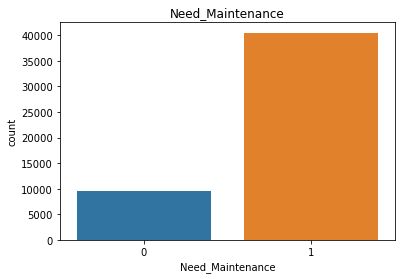

In [13]:
sns.countplot(data=df, x='Need_Maintenance')
plt.title('Need_Maintenance')
plt.show()

**Need_Maintenance = 1 is taller than the bar for Need_Maintenance = 0.**

A larger proportion of vehicles in the dataset require maintenance compared to those that do not. This indicates potential issues with vehicle reliability or the need for better maintenance schedules.

## Checking for Outliers

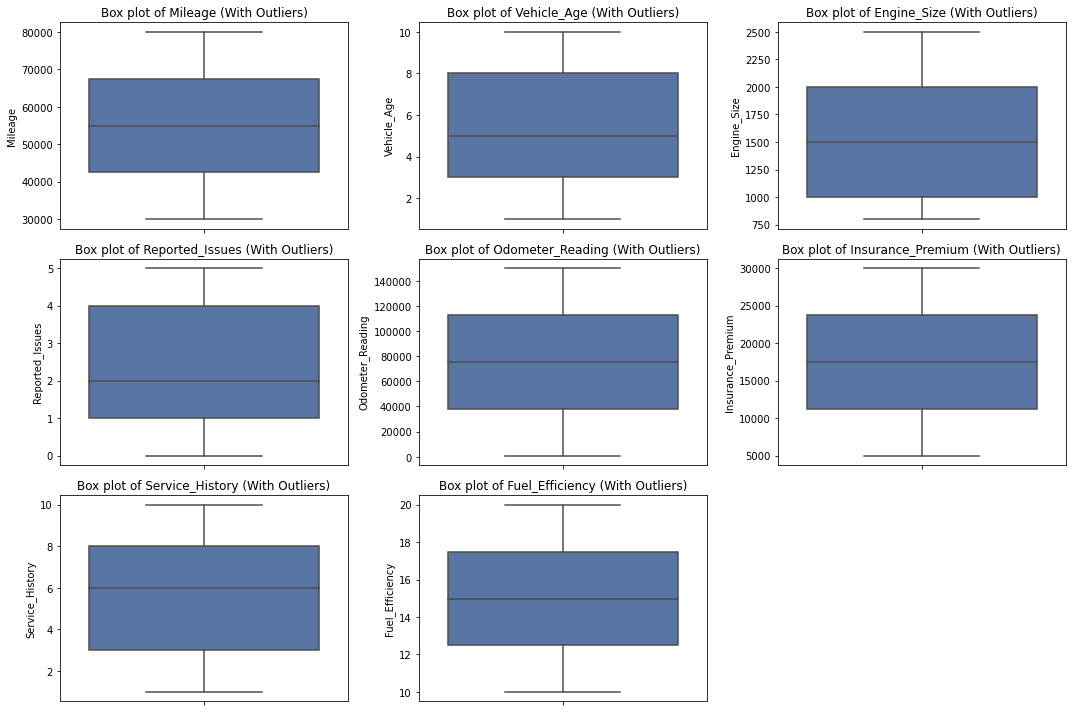

In [50]:
def plot_boxplots_with_outliers(data, numerical_columns):
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=data, y=col, palette="deep")
        plt.title(f'Box plot of {col} (With Outliers)')
    plt.tight_layout()
    plt.show()

numerical_columns = ['Mileage', 'Vehicle_Age', 'Engine_Size','Reported_Issues', 'Odometer_Reading', 'Insurance_Premium', 'Service_History', 'Fuel_Efficiency']
plot_boxplots_with_outliers(df, numerical_columns)



After running the plot_boxplots_with_outliers function,I observed that there are no outliers in the box plots for each numerical column, which concludes the following:

**Clean Data:** The numerical columns in my dataset do not contain significant outliers, indicating that the data is well-behaved and clean.


**No Further Outlier Handling Needed:** Since there are no outliers, there's no need to apply outlier handling techniques such as trimming or winsorizing.

### Pair Plot

To explore the relationships between pairs of numerical features and attrition.

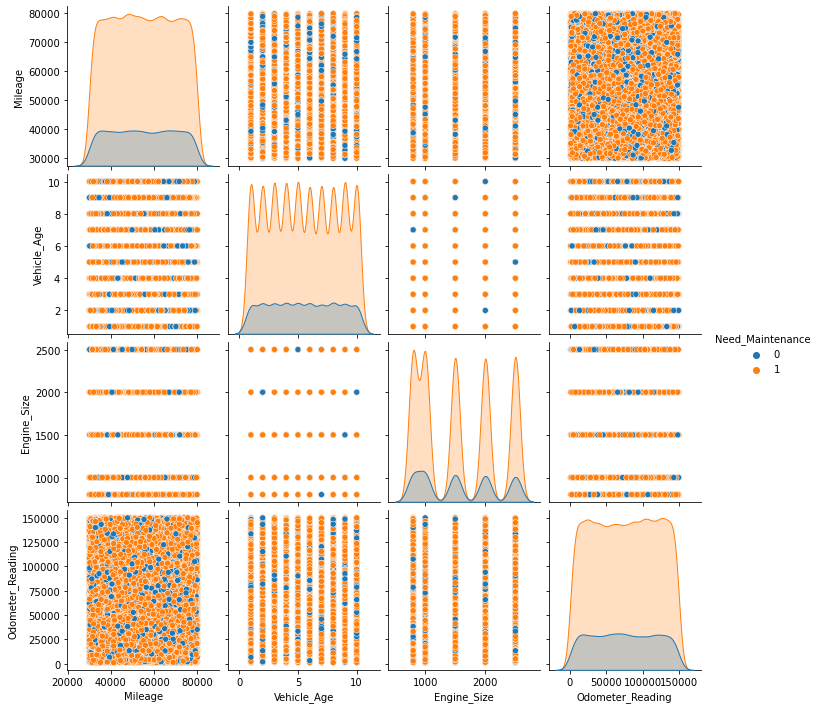

In [15]:
sns.pairplot(df, hue='Need_Maintenance', vars=['Mileage', 'Vehicle_Age', 'Engine_Size','Odometer_Reading'])
plt.show()

### Bar Plot

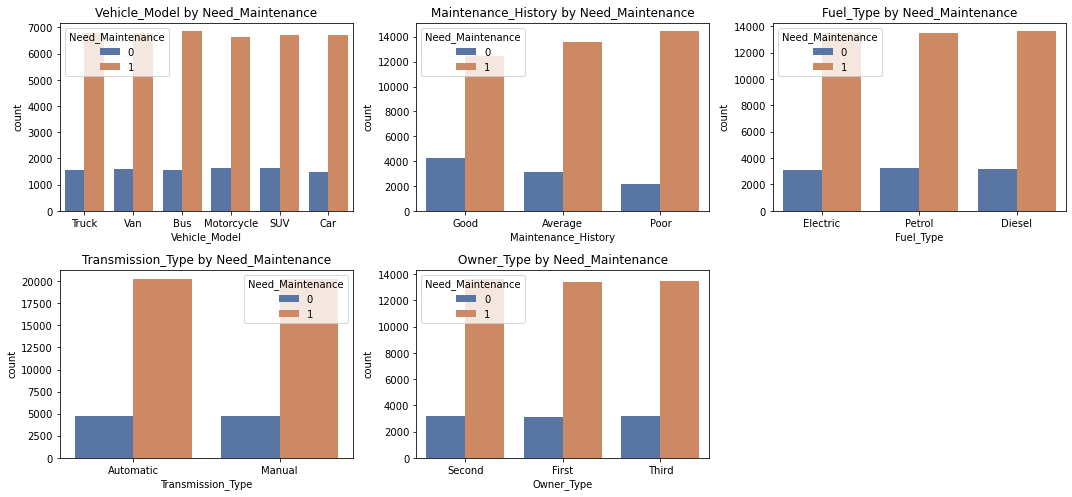

In [16]:
def plot_countplots_with_Need_Maintenance(df, categorical_columns):
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(x=col, hue='Need_Maintenance', data=df, palette="deep")
        plt.title(f'{col} by Need_Maintenance')
    plt.tight_layout()
    plt.show()

# List of categorical features to plot
categorical_columns = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type', 'Owner_Type']

plot_countplots_with_Need_Maintenance(df, categorical_columns)

The above helps to see how categorical features like'Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type', 'Owner_Type' vary across the target variable.

## MODELLING

### One-Hot Encoding

In [17]:
# Define categorical columns
categorical_columns = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type', 'Owner_Type','Tire_Condition' , 'Brake_Condition', 'Battery_Status' ]
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Convert boolean columns to binary (0/1)
boolean_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)
# Check the encoded dataframe
df_encoded.head()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Insurance_Premium,Service_History,Accident_History,...,Fuel_Type_Petrol,Transmission_Type_Manual,Owner_Type_Second,Owner_Type_Third,Tire_Condition_New,Tire_Condition_Worn Out,Brake_Condition_New,Brake_Condition_Worn Out,Battery_Status_New,Battery_Status_Weak
0,58765,0,4,2000,28524,2023-11-23,2025-06-24,20782,6,3,...,0,0,1,0,1,0,1,0,0,1
1,60353,1,7,2500,133630,2023-09-21,2025-06-04,23489,7,0,...,0,0,1,0,1,0,1,0,0,1
2,68072,0,2,1500,34022,2023-06-27,2025-04-27,17979,7,0,...,0,0,0,0,1,0,0,0,0,1
3,60849,4,5,2500,81636,2023-08-24,2025-11-05,6220,7,3,...,1,0,1,0,1,0,0,1,1,0
4,45742,5,1,2000,97162,2023-05-25,2025-09-14,16446,6,2,...,1,1,0,1,0,0,0,0,0,1


In [18]:
print(df_encoded.dtypes)


Mileage                              int64
Reported_Issues                      int64
Vehicle_Age                          int64
Engine_Size                          int64
Odometer_Reading                     int64
Last_Service_Date           datetime64[ns]
Warranty_Expiry_Date        datetime64[ns]
Insurance_Premium                    int64
Service_History                      int64
Accident_History                     int64
Fuel_Efficiency                    float64
Need_Maintenance                     int64
Vehicle_Model_Car                    uint8
Vehicle_Model_Motorcycle             uint8
Vehicle_Model_SUV                    uint8
Vehicle_Model_Truck                  uint8
Vehicle_Model_Van                    uint8
Maintenance_History_Good             uint8
Maintenance_History_Poor             uint8
Fuel_Type_Electric                   uint8
Fuel_Type_Petrol                     uint8
Transmission_Type_Manual             uint8
Owner_Type_Second                    uint8
Owner_Type_

### Train_test_split

In [19]:
X = df_encoded.drop(columns = ['Need_Maintenance','Last_Service_Date','Warranty_Expiry_Date'])
y = df_encoded['Need_Maintenance']
    
 # Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Train the logistic regression classifier

In [43]:
# Initialize the logistic regression classifier
log_reg = LogisticRegression(random_state=42)

In [44]:
# Train the logistic regression classifier
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Evaluate the Model

In [45]:
# Predictions on the testing set
log_reg_y_pred = log_reg.predict(X_test)


In [46]:
# Model evaluation
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)


Logistic Regression Accuracy: 0.8101851851851852


**Accuracy:** The logistic regression classifier achieved an accuracy of approximately 0.81 on the testing set, indicating that it correctly predicted the Need_Maintenance target variable for around 81% of the instances in the testing data.

In [47]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, log_reg_y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      8108
           1       0.83      0.78      0.80      8092

    accuracy                           0.81     16200
   macro avg       0.81      0.81      0.81     16200
weighted avg       0.81      0.81      0.81     16200



**Classification Report:** The precision, recall, and F1-score for both classes are 1.0, which is unlikely and suggests that there may be some issue with the model or the data. Further investigation is needed to understand this discrepancy.

In [48]:
# We extract feature importance (coefficients) from the logistic regression model
feature_importance = log_reg.coef_[0]

# We create a DataFrame to display feature names and their corresponding coefficients
feature_names = X.columns 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)


top_n = 10  
print("Top {} most important features:".format(top_n))
print(feature_importance_df.head(top_n))

Top 10 most important features:
                     Feature  Coefficient
1            Reported_Issues     1.032475
6            Service_History     0.295783
7           Accident_History     0.277303
24  Brake_Condition_Worn Out     0.252982
26       Battery_Status_Weak     0.250846
15  Maintenance_History_Poor     0.157091
18  Transmission_Type_Manual     0.109398
16        Fuel_Type_Electric     0.100005
21        Tire_Condition_New     0.097581
19         Owner_Type_Second     0.097154


### Train the Random Forest classifier

- Initialize the Random Forest classifier
- Train the Random Forest classifier
- Then make meaningful Predictions on the testing set
- The final step is to evaluate

In [25]:
rf_classifier = RandomForestClassifier(random_state=42)

In [26]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate the Model

In [27]:
y_pred = rf_classifier.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Accuracy:** The random forest classifier also achieved an accuracy of 1.0 on the testing set, indicating perfect predictions for the Need_Maintenance target variable.

In [29]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2855
           1       1.00      1.00      1.00     12145

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



**Classification Report:** Similary, the precision, recall, and F1-score for both classes are 1.0, indicating perfect performance.

In [30]:
# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Feature Importance:
                     Feature  Importance
1            Reported_Issues    0.302864
26       Battery_Status_Weak    0.195952
24  Brake_Condition_Worn Out    0.182924
6            Service_History    0.070638
7           Accident_History    0.043835
15  Maintenance_History_Poor    0.029704
14  Maintenance_History_Good    0.026903
25        Battery_Status_New    0.021152
23       Brake_Condition_New    0.019722
4           Odometer_Reading    0.016591
5          Insurance_Premium    0.016484
8            Fuel_Efficiency    0.016423
0                    Mileage    0.016359
2                Vehicle_Age    0.009335
3                Engine_Size    0.006737
18  Transmission_Type_Manual    0.002542
22   Tire_Condition_Worn Out    0.002319
17          Fuel_Type_Petrol    0.002252
16        Fuel_Type_Electric    0.002198
19         Owner_Type_Second    0.002197
20          Owner_Type_Third    0.002172
21        Tire_Condition_New    0.002133
11         Vehicle_Model_SUV    0.00

**Feature Importance:** Random Forest classifier identified Battery_Status_Weak, Brake_Condition_Worn Out, and Reported_Issues as important features for predicting the target variable.

### Balancing Classes Using SMOTE for Improved Feature Importance Analysis


- We applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in my dataset.


- This step is crucial to ensure that our machine learning model, specifically a Logistic Regression classifier, can accurately identify and emphasize important features like Battery_Status_Weak, Brake_Condition_Worn Out, and Reported_Issues for predicting the target variable. 



- By resampling the dataset to address class imbalance, we enhanced the model's ability to learn from both minority and majority class instances effectively.

In [31]:
# We apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [32]:
# We Split the dataset again
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [37]:
# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Initial broad search grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [38]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [39]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [40]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best parameters found: ", best_params)


Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [41]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model: ", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the best model:  0.9700617283950618

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8108
           1       0.98      0.96      0.97      8092

    accuracy                           0.97     16200
   macro avg       0.97      0.97      0.97     16200
weighted avg       0.97      0.97      0.97     16200



**- The accuracy** of the best-performing logistic regression model is approximately 97%, indicating that the model predicts maintenance needs correctly for the majority of instances in the test set.


- Moreover, Precision and recall scores for both classes (maintenance required and no maintenance required) are high, approaching 0.97. 


- This indicates that the model strikes a compromise between limiting false positives and false negatives, resulting in credible predictions.

In [42]:
feature_importance = best_model.coef_[0]

feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

top_n = 10  
print("Top {} most important features:".format(top_n))
print(feature_importance_df.head(top_n))

Top 10 most important features:
                     Feature  Coefficient
24  Brake_Condition_Worn Out    12.372140
26       Battery_Status_Weak    12.116794
15  Maintenance_History_Poor     2.413346
1            Reported_Issues     2.276965
9          Vehicle_Model_Car     0.924330
12       Vehicle_Model_Truck     0.916510
10  Vehicle_Model_Motorcycle     0.908453
7           Accident_History     0.880268
13         Vehicle_Model_Van     0.877972
11         Vehicle_Model_SUV     0.815142


The logistic regression model's top ten most essential features reveal the factors that influence maintenance needs:

**Brake_Condition_Worn Out:** Vehicles with worn-out brakes are highly related with maintenance requirements, with a coefficient of around 12.37.


**Battery_Status_Weak:** Similarly, automobiles with a weak battery status are strong indicators of maintenance needs, with a coefficient of approximately 12.12.


**Other features:** Maintenance history characterized as "Poor" and reported difficulties also had a considerable impact on predicting maintenance needs, with coefficients of roughly 2.41 and 2.28. 

Furthermore, various vehicle models such as Car, Truck, Motorcycle, and Van have positive coefficients, demonstrating their impact on maintenance estimates.

## Model Visualization

### 1.  Confusion Matrix

In [53]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix - {}".format(model_name))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### 2. ROC Curve

In [54]:
def plot_roc_curve(model, X_test, y_test, model_name):
    y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

### 3. Logistics Regression Visualization

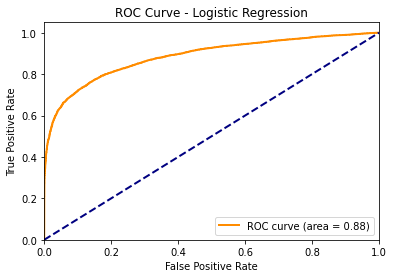

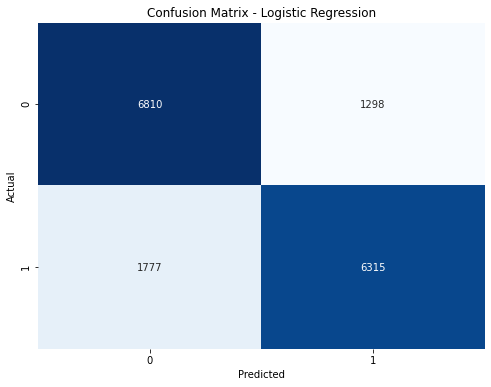

In [55]:
plot_roc_curve(log_reg, X_test, y_test, "Logistic Regression")
plot_confusion_matrix(log_reg, X_test, y_test, "Logistic Regression")

**Logistic Regression:** 


- Displays a balanced number of true positives and true negatives, indicating decent accuracy but some misclassifications.


- A good ROC curve with an area under the curve (AUC) indicating reasonable predictive power.



### 4. Random Forest Visualization

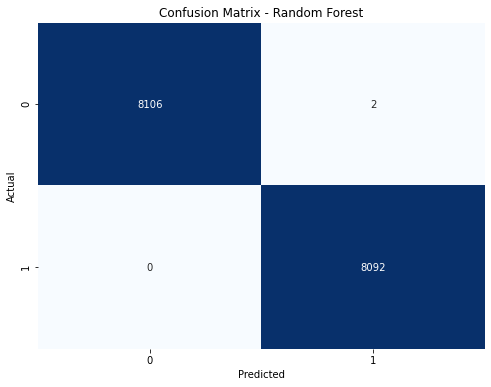

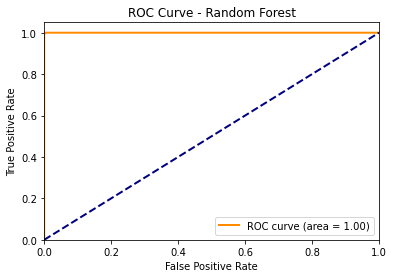

In [56]:
plot_confusion_matrix(rf_classifier, X_test, y_test, "Random Forest")
plot_roc_curve(rf_classifier, X_test, y_test, "Random Forest")

**Random Forest:** 

- Shows perfect classification with no false positives or false negatives, indicating overfitting.


- Near-perfect ROC curve with an AUC close to 1.0, reinforcing the model's overfitting on the test data.

### 5. Tuned Logistics Regression Visualization

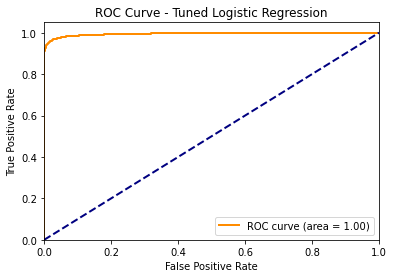

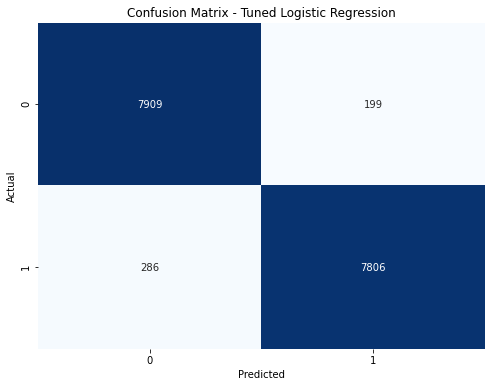

In [57]:
plot_roc_curve(best_model, X_test, y_test, "Tuned Logistic Regression")
plot_confusion_matrix(best_model, X_test, y_test, "Tuned Logistic Regression")

**Tuned Logistic Regression:** 


- Improved performance with fewer misclassifications compared to the baseline Logistic Regression.


- Shows an improved ROC curve with higher AUC compared to the baseline, demonstrating better performance post-tuning.